### Part1

#### A neural network to maximize the log likelihood of label is one that has softmax output nodes and minimizes the criterion function of the negative log probability of training data set

The last step for a simple deep neural network would be to determine a way to choose values of θ that maximize the likelihood of your training data. Typically, you write a log-likelihood function, and then find the values that maximize it.

In fact, it's relatively trivial to prove that minimizing the loss is equivalent to maximizing the likelihood of the input. Typically, in academic papers, you may see people prefer maximizing likelihood simply for the mere fact that some proofs are easier that way.

Example
Consider the Binary Cross Entropy formula

CE(y,x,θ)=−∑i=1nyilogpθ(y∣xi)+(1−yi)log(1−pθ)(y∣xi)).

Naturally, you would optimize this with respect to θ.

We can instead choose to take a probabilistic approach and maximize the likelihood of the data under some probabilistic model. A natural choice would be to use a Bernoulli distribution, such that

p(y∣π)=∏i=1yiπyii(1−πi)1−yi.

Now, the task here is to train a neural network to estimate π. The likelihood function is simply

p(y∣x,θ)=∏i=1yipθ(y∣xi)yi(1−pθ(y∣xi))1−yi.

We want to maximize the function w.r.t θ.

Now, if you take the log, and we find

∑i=1nyilogpθ(y∣xi)+(1−yi)log(1−pθ)(y∣xi)).

Thus there is literally no difference in minimizing a cross entropy or maximizing the log likelihood.

Therefore, the only difference is the approach. At the end of the day, you're doing the same thing regardless what you choose to call it.

<p>Need to produce a vector</p>
$\hat{y}$ = $\hat{y}_{i} = p(y = i|x) $ 
<p>Linear layer first produces unnormalized log probabilities: </p>$ z = W^Th + b $
<p>Softmax is given by </p>
$ Softmax(z)_{i} = \dfrac{exp(z_{i})}{\sum_{j} exp(z_{j})}$ </br>
<p>Log of the softmax is given by </p>
$ logsoftmax(z)_{i} = z_{i} - log\sum_{j}exp(z_{j})$</br>

$ z_{i}$ term never saturates
Maximizing log-likelihood encourages $ z_{i}$ to be pushed up, while encouraging all z to be pushed down
Log-likelihood cost function, $~z_{i} - max_{j}z_{j}$,strongly penalizes the most active incorrect prediction
If the model has the correct answer

$log\sum_{j}exp(z_{j}) = max_{j}z_{j}$ and $z_{i}$ will cancel out

#### A neural network to maximize the a posterior likelihood of observing the training data given a Gaussian prior of the weight distribution is one that minimizes the criterion function with L2 regularization

he loss function as described above would be given by

L=[∑n=1N(y(n)−fw(x(n)))2]

Originallossfunction+λ∑i=1Kw2i

L2loss

Note that the distribution for a multivariate Gaussian is

N(x;μ,Σ)=1(2π)D/2|Σ|1/2exp(−12(x−μ)⊤Σ−1(x−μ))

Using Bayes rule, we have that

p(w|D)=p(D|w)p(w)p(D)∝p(D|w)p(w)∝[∏nNN(y(n);fw(x(n)),σ2y)]N(w;0,σ2wI)∝∏nNN(y(n);fw(x(n)),σ2y)∏KN(wi;0,σ2w)

Where we are able to split the multi-dimensional Guassian into a product, because the covariance is a multiple of the identity matrix.

Take negative log probability

−log[p(w|D)]=−∑Nlog[N(y(n);fw(x(n)),σ2y)]−∑Klog[N(wi;0,σ2w)]+const.=12σ2y∑N(y(n)−fw(x(n)))2+12σ2w∑Kw2i+const.

We can of course drop the constant, and multiply by any amount without fundamentally affecting the loss function. (constant does nothing, multiplication effectively scales the learning rate. Will not affect the location of minima)So we can see that the negative log probability of the posterior distribution is an equivalent loss function to the L2 regularized square error loss function.

This equivelance is general and holds for any parameterized function of weights - not just linear regression as seems to be implied above.

In [2]:
import theano
import theano.tensor as T 
import numpy as np

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\manju\AppData\Local\conda\conda\envs\Python\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [5]:
from PIL import Image
import os
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
import pickle
import gzip
import scipy.sparse
import numpy as np
from math import exp

Using TensorFlow backend.


In [15]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
import pickle
import gzip
import scipy.sparse
import numpy as np
from math import exp
training_data = gzip.open("C:\\Users\\manju\\Documents\\PR\\proj4\\train-images-idx3-ubyte.gz", 'rb')
test_data = gzip.open("C:\\Users\\manju\\Documents\\PR\\proj4\\t10k-images-idx3-ubyte.gz", 'rb')
train_label = gzip.open("C:\\Users\\manju\\Documents\\PR\\proj4\\train-labels-idx1-ubyte.gz", 'rb')
test_label = gzip.open("C:\\Users\\manju\\Documents\\PR\\proj4\\t10k-labels-idx1-ubyte.gz", 'rb')


In [16]:
import mnist
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
train_hd_data = mnist.train_images()
train_hd_labels = mnist.train_labels()
test_hd_data = mnist.test_images()
test_hd_labels = mnist.test_labels()
train_hd_data = train_hd_data.reshape(-1,784)
test_hd_data = test_hd_data.reshape(-1,784)

In [1]:

import tensorflow as tf
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data')

def input(dataset):
    return dataset.images, dataset.labels.astype(np.int32)

# Specify feature
feature_columns = [tf.feature_column.numeric_column("x", shape=[28, 28])]

# Build 2 layer DNN classifier
classifier = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units=[256, 32],
    optimizer=tf.train.AdamOptimizer(1e-4),
    n_classes=10,
    dropout=0.1,
    model_dir="./tmp/mnist_model"
)

# Define the training inputs
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": input(mnist.train)[0]},
    y=input(mnist.train)[1],
    num_epochs=None,
    batch_size=50,
    shuffle=True
)

classifier.train(input_fn=train_input_fn, steps=100000)

# Define the test inputs
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": input(mnist.test)[0]},
    y=input(mnist.test)[1],
    num_epochs=1,
    shuffle=False
)

# Evaluate accuracy
accuracy_score = classifier.evaluate(input_fn=test_input_fn)["accuracy"]
print("\nTest Accuracy: {0:f}%\n".format(accuracy_score*100))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
INFO:tensorflow:Using default config.
I

INFO:tensorflow:global_step/sec: 584.794
INFO:tensorflow:loss = 15.374434, step = 2401 (0.170 sec)
INFO:tensorflow:global_step/sec: 602.401
INFO:tensorflow:loss = 4.7182536, step = 2501 (0.166 sec)
INFO:tensorflow:global_step/sec: 595.239
INFO:tensorflow:loss = 12.2303, step = 2601 (0.168 sec)
INFO:tensorflow:global_step/sec: 591.735
INFO:tensorflow:loss = 15.27813, step = 2701 (0.169 sec)
INFO:tensorflow:global_step/sec: 602.401
INFO:tensorflow:loss = 11.023469, step = 2801 (0.167 sec)
INFO:tensorflow:global_step/sec: 598.808
INFO:tensorflow:loss = 14.281148, step = 2901 (0.166 sec)
INFO:tensorflow:global_step/sec: 578.033
INFO:tensorflow:loss = 28.757898, step = 3001 (0.173 sec)
INFO:tensorflow:global_step/sec: 606.061
INFO:tensorflow:loss = 5.5035605, step = 3101 (0.165 sec)
INFO:tensorflow:global_step/sec: 598.802
INFO:tensorflow:loss = 14.682075, step = 3201 (0.167 sec)
INFO:tensorflow:global_step/sec: 595.236
INFO:tensorflow:loss = 12.498584, step = 3301 (0.169 sec)
INFO:tensorfl

INFO:tensorflow:loss = 4.336366, step = 10701 (0.172 sec)
INFO:tensorflow:global_step/sec: 591.72
INFO:tensorflow:loss = 4.701976, step = 10801 (0.167 sec)
INFO:tensorflow:global_step/sec: 598.802
INFO:tensorflow:loss = 7.3540297, step = 10901 (0.167 sec)
INFO:tensorflow:global_step/sec: 595.24
INFO:tensorflow:loss = 3.7214327, step = 11001 (0.168 sec)
INFO:tensorflow:global_step/sec: 595.226
INFO:tensorflow:loss = 4.885006, step = 11101 (0.168 sec)
INFO:tensorflow:global_step/sec: 591.73
INFO:tensorflow:loss = 1.4396577, step = 11201 (0.169 sec)
INFO:tensorflow:global_step/sec: 595.235
INFO:tensorflow:loss = 3.243797, step = 11301 (0.168 sec)
INFO:tensorflow:global_step/sec: 584.8
INFO:tensorflow:loss = 1.511132, step = 11401 (0.171 sec)
INFO:tensorflow:global_step/sec: 581.379
INFO:tensorflow:loss = 10.471447, step = 11501 (0.172 sec)
INFO:tensorflow:global_step/sec: 595.255
INFO:tensorflow:loss = 7.4040947, step = 11601 (0.168 sec)
INFO:tensorflow:global_step/sec: 595.235
INFO:tenso

INFO:tensorflow:global_step/sec: 591.718
INFO:tensorflow:loss = 0.7128622, step = 19001 (0.169 sec)
INFO:tensorflow:global_step/sec: 602.412
INFO:tensorflow:loss = 0.89955693, step = 19101 (0.166 sec)
INFO:tensorflow:global_step/sec: 588.228
INFO:tensorflow:loss = 6.4526296, step = 19201 (0.170 sec)
INFO:tensorflow:global_step/sec: 598.808
INFO:tensorflow:loss = 1.0354612, step = 19301 (0.167 sec)
INFO:tensorflow:global_step/sec: 595.23
INFO:tensorflow:loss = 3.8222475, step = 19401 (0.168 sec)
INFO:tensorflow:global_step/sec: 598.81
INFO:tensorflow:loss = 5.5878153, step = 19501 (0.167 sec)
INFO:tensorflow:global_step/sec: 578.029
INFO:tensorflow:loss = 1.1140605, step = 19601 (0.173 sec)
INFO:tensorflow:global_step/sec: 591.725
INFO:tensorflow:loss = 4.012669, step = 19701 (0.168 sec)
INFO:tensorflow:global_step/sec: 591.7
INFO:tensorflow:loss = 3.8258822, step = 19801 (0.170 sec)
INFO:tensorflow:global_step/sec: 602.42
INFO:tensorflow:loss = 1.7681222, step = 19901 (0.166 sec)
INFO:

INFO:tensorflow:loss = 0.88750666, step = 27201 (0.169 sec)
INFO:tensorflow:global_step/sec: 609.76
INFO:tensorflow:loss = 1.0297341, step = 27301 (0.164 sec)
INFO:tensorflow:global_step/sec: 606.058
INFO:tensorflow:loss = 0.4736017, step = 27401 (0.164 sec)
INFO:tensorflow:global_step/sec: 606.062
INFO:tensorflow:loss = 1.7495307, step = 27501 (0.167 sec)
INFO:tensorflow:global_step/sec: 621.112
INFO:tensorflow:loss = 4.787782, step = 27601 (0.163 sec)
INFO:tensorflow:global_step/sec: 613.503
INFO:tensorflow:loss = 1.9891183, step = 27701 (0.160 sec)
INFO:tensorflow:global_step/sec: 598.803
INFO:tensorflow:loss = 1.7209723, step = 27801 (0.167 sec)
INFO:tensorflow:global_step/sec: 624.998
INFO:tensorflow:loss = 0.36531755, step = 27901 (0.160 sec)
INFO:tensorflow:global_step/sec: 621.118
INFO:tensorflow:loss = 4.233662, step = 28001 (0.160 sec)
INFO:tensorflow:global_step/sec: 591.716
INFO:tensorflow:loss = 0.3167823, step = 28101 (0.170 sec)
INFO:tensorflow:global_step/sec: 625.002
I

INFO:tensorflow:global_step/sec: 561.796
INFO:tensorflow:loss = 1.9970648, step = 35501 (0.178 sec)
INFO:tensorflow:global_step/sec: 510.197
INFO:tensorflow:loss = 0.21101508, step = 35601 (0.196 sec)
INFO:tensorflow:global_step/sec: 534.77
INFO:tensorflow:loss = 0.8009113, step = 35701 (0.187 sec)
INFO:tensorflow:global_step/sec: 537.632
INFO:tensorflow:loss = 1.7418729, step = 35801 (0.185 sec)
INFO:tensorflow:global_step/sec: 561.799
INFO:tensorflow:loss = 0.28876913, step = 35901 (0.180 sec)
INFO:tensorflow:global_step/sec: 543.48
INFO:tensorflow:loss = 2.7703876, step = 36001 (0.183 sec)
INFO:tensorflow:global_step/sec: 546.436
INFO:tensorflow:loss = 0.3553288, step = 36101 (0.183 sec)
INFO:tensorflow:global_step/sec: 537.636
INFO:tensorflow:loss = 2.6567185, step = 36201 (0.187 sec)
INFO:tensorflow:global_step/sec: 500.007
INFO:tensorflow:loss = 1.2834663, step = 36301 (0.198 sec)
INFO:tensorflow:global_step/sec: 561.798
INFO:tensorflow:loss = 0.51875836, step = 36401 (0.179 sec)

INFO:tensorflow:global_step/sec: 598.803
INFO:tensorflow:loss = 0.82026136, step = 43701 (0.167 sec)
INFO:tensorflow:global_step/sec: 543.481
INFO:tensorflow:loss = 0.63507515, step = 43801 (0.184 sec)
INFO:tensorflow:global_step/sec: 537.626
INFO:tensorflow:loss = 0.9674871, step = 43901 (0.186 sec)
INFO:tensorflow:global_step/sec: 602.416
INFO:tensorflow:loss = 0.38148114, step = 44001 (0.166 sec)
INFO:tensorflow:global_step/sec: 588.235
INFO:tensorflow:loss = 0.5356854, step = 44101 (0.170 sec)
INFO:tensorflow:global_step/sec: 598.805
INFO:tensorflow:loss = 0.19409372, step = 44201 (0.167 sec)
INFO:tensorflow:global_step/sec: 591.716
INFO:tensorflow:loss = 0.16613376, step = 44301 (0.169 sec)
INFO:tensorflow:global_step/sec: 584.794
INFO:tensorflow:loss = 0.8322777, step = 44401 (0.171 sec)
INFO:tensorflow:global_step/sec: 578.035
INFO:tensorflow:loss = 0.2733504, step = 44501 (0.173 sec)
INFO:tensorflow:global_step/sec: 595.239
INFO:tensorflow:loss = 0.28010947, step = 44601 (0.168

INFO:tensorflow:global_step/sec: 598.801
INFO:tensorflow:loss = 0.46236962, step = 51901 (0.167 sec)
INFO:tensorflow:global_step/sec: 595.237
INFO:tensorflow:loss = 0.4046513, step = 52001 (0.168 sec)
INFO:tensorflow:global_step/sec: 588.233
INFO:tensorflow:loss = 0.44874498, step = 52101 (0.170 sec)
INFO:tensorflow:global_step/sec: 591.716
INFO:tensorflow:loss = 0.13286376, step = 52201 (0.169 sec)
INFO:tensorflow:global_step/sec: 574.713
INFO:tensorflow:loss = 0.07545994, step = 52301 (0.174 sec)
INFO:tensorflow:global_step/sec: 595.242
INFO:tensorflow:loss = 1.1036563, step = 52401 (0.168 sec)
INFO:tensorflow:global_step/sec: 595.235
INFO:tensorflow:loss = 1.279266, step = 52501 (0.167 sec)
INFO:tensorflow:global_step/sec: 598.803
INFO:tensorflow:loss = 0.5963909, step = 52601 (0.168 sec)
INFO:tensorflow:global_step/sec: 602.411
INFO:tensorflow:loss = 0.80756354, step = 52701 (0.166 sec)
INFO:tensorflow:global_step/sec: 591.707
INFO:tensorflow:loss = 0.5425241, step = 52801 (0.169 s

INFO:tensorflow:loss = 0.13498652, step = 60001 (0.166 sec)
INFO:tensorflow:global_step/sec: 595.231
INFO:tensorflow:loss = 0.03798679, step = 60101 (0.168 sec)
INFO:tensorflow:global_step/sec: 574.708
INFO:tensorflow:loss = 0.21711817, step = 60201 (0.174 sec)
INFO:tensorflow:global_step/sec: 555.559
INFO:tensorflow:loss = 0.09172588, step = 60301 (0.180 sec)
INFO:tensorflow:global_step/sec: 591.72
INFO:tensorflow:loss = 0.67883265, step = 60401 (0.169 sec)
INFO:tensorflow:global_step/sec: 591.721
INFO:tensorflow:loss = 0.0420096, step = 60501 (0.169 sec)
INFO:tensorflow:global_step/sec: 588.231
INFO:tensorflow:loss = 0.2796377, step = 60601 (0.170 sec)
INFO:tensorflow:global_step/sec: 598.804
INFO:tensorflow:loss = 0.35151812, step = 60701 (0.167 sec)
INFO:tensorflow:global_step/sec: 578.035
INFO:tensorflow:loss = 0.211128, step = 60801 (0.173 sec)
INFO:tensorflow:global_step/sec: 598.803
INFO:tensorflow:loss = 0.15055883, step = 60901 (0.167 sec)
INFO:tensorflow:global_step/sec: 595

INFO:tensorflow:global_step/sec: 598.792
INFO:tensorflow:loss = 0.014187875, step = 68201 (0.168 sec)
INFO:tensorflow:global_step/sec: 595.24
INFO:tensorflow:loss = 0.32371527, step = 68301 (0.168 sec)
INFO:tensorflow:global_step/sec: 598.812
INFO:tensorflow:loss = 0.15586457, step = 68401 (0.167 sec)
INFO:tensorflow:global_step/sec: 598.8
INFO:tensorflow:loss = 0.23097116, step = 68501 (0.167 sec)
INFO:tensorflow:global_step/sec: 595.24
INFO:tensorflow:loss = 2.6607828, step = 68601 (0.169 sec)
INFO:tensorflow:global_step/sec: 581.388
INFO:tensorflow:loss = 0.25789675, step = 68701 (0.176 sec)
INFO:tensorflow:global_step/sec: 571.434
INFO:tensorflow:loss = 0.051719204, step = 68801 (0.170 sec)
INFO:tensorflow:global_step/sec: 598.804
INFO:tensorflow:loss = 0.017473843, step = 68901 (0.167 sec)
INFO:tensorflow:global_step/sec: 595.24
INFO:tensorflow:loss = 0.08216923, step = 69001 (0.168 sec)
INFO:tensorflow:global_step/sec: 588.232
INFO:tensorflow:loss = 0.08652501, step = 69101 (0.17

INFO:tensorflow:loss = 0.3206392, step = 76301 (0.170 sec)
INFO:tensorflow:global_step/sec: 588.23
INFO:tensorflow:loss = 0.07563914, step = 76401 (0.170 sec)
INFO:tensorflow:global_step/sec: 591.717
INFO:tensorflow:loss = 0.10559715, step = 76501 (0.169 sec)
INFO:tensorflow:global_step/sec: 591.717
INFO:tensorflow:loss = 0.14312671, step = 76601 (0.169 sec)
INFO:tensorflow:global_step/sec: 595.239
INFO:tensorflow:loss = 0.050073244, step = 76701 (0.168 sec)
INFO:tensorflow:global_step/sec: 598.799
INFO:tensorflow:loss = 0.060878385, step = 76801 (0.167 sec)
INFO:tensorflow:global_step/sec: 581.397
INFO:tensorflow:loss = 0.35416108, step = 76901 (0.172 sec)
INFO:tensorflow:global_step/sec: 591.72
INFO:tensorflow:loss = 0.050995994, step = 77001 (0.169 sec)
INFO:tensorflow:global_step/sec: 595.237
INFO:tensorflow:loss = 0.13281444, step = 77101 (0.168 sec)
INFO:tensorflow:global_step/sec: 588.234
INFO:tensorflow:loss = 0.12235561, step = 77201 (0.170 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 595.236
INFO:tensorflow:loss = 0.036781546, step = 84501 (0.169 sec)
INFO:tensorflow:global_step/sec: 588.238
INFO:tensorflow:loss = 0.04378692, step = 84601 (0.170 sec)
INFO:tensorflow:global_step/sec: 602.41
INFO:tensorflow:loss = 0.0056856526, step = 84701 (0.166 sec)
INFO:tensorflow:global_step/sec: 574.711
INFO:tensorflow:loss = 2.969183, step = 84801 (0.174 sec)
INFO:tensorflow:global_step/sec: 561.796
INFO:tensorflow:loss = 0.027233258, step = 84901 (0.178 sec)
INFO:tensorflow:global_step/sec: 595.226
INFO:tensorflow:loss = 1.5911837, step = 85001 (0.168 sec)
INFO:tensorflow:global_step/sec: 602.418
INFO:tensorflow:loss = 0.07141542, step = 85101 (0.166 sec)
INFO:tensorflow:global_step/sec: 574.716
INFO:tensorflow:loss = 0.4369882, step = 85201 (0.174 sec)
INFO:tensorflow:global_step/sec: 598.808
INFO:tensorflow:loss = 0.18266855, step = 85301 (0.167 sec)
INFO:tensorflow:global_step/sec: 595.236
INFO:tensorflow:loss = 0.022012033, step = 85401 (0

INFO:tensorflow:global_step/sec: 549.454
INFO:tensorflow:loss = 0.21188904, step = 92601 (0.182 sec)
INFO:tensorflow:global_step/sec: 581.395
INFO:tensorflow:loss = 1.1101092, step = 92701 (0.173 sec)
INFO:tensorflow:global_step/sec: 581.39
INFO:tensorflow:loss = 0.0565895, step = 92801 (0.172 sec)
INFO:tensorflow:global_step/sec: 588.24
INFO:tensorflow:loss = 0.0036643045, step = 92901 (0.169 sec)
INFO:tensorflow:global_step/sec: 595.238
INFO:tensorflow:loss = 0.03210535, step = 93001 (0.168 sec)
INFO:tensorflow:global_step/sec: 588.23
INFO:tensorflow:loss = 0.0523087, step = 93101 (0.170 sec)
INFO:tensorflow:global_step/sec: 584.791
INFO:tensorflow:loss = 0.121448636, step = 93201 (0.171 sec)
INFO:tensorflow:global_step/sec: 602.415
INFO:tensorflow:loss = 0.035967495, step = 93301 (0.166 sec)
INFO:tensorflow:global_step/sec: 584.773
INFO:tensorflow:loss = 0.1620219, step = 93401 (0.171 sec)
INFO:tensorflow:global_step/sec: 581.421
INFO:tensorflow:loss = 0.09905863, step = 93501 (0.17

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-16-20:32:51
INFO:tensorflow:Saving dict for global step 100000: accuracy = 0.982, average_loss = 0.08383251, global_step = 100000, loss = 10.611711
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 100000: ./tmp/mnist_model\model.ckpt-100000

Test Accuracy: 98.199999%



In [237]:
import numpy
import tensorflow as tf
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import keras
import keras.backend as K
from keras.callbacks import LambdaCallback
from keras import regularizers
from keras.regularizers import l2

In [238]:
import numpy
import tensorflow as tf
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import keras
import keras.backend as K
from keras.callbacks import LambdaCallback
from keras.regularizers import l2


seed = 7
numpy.random.seed(seed)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

### Single layer without regularizer

In [239]:
dats = {}
for i in range(0,10):
    temp_dat=np.zeros(shape=(100,784))
    temp2=X_train[y_train[:,]==i]
    temp_dat=temp2[0:100,:]
    dats[i] = (temp_dat)

In [240]:
p_train = np.concatenate((dats[0],dats[1],dats[2],dats[3],dats[4],dats[5],dats[6],dats[7],dats[8],dats[9]))

In [241]:
dats = {}
for i in range(0,10):
    temp_dat=np.zeros(shape=(100,784))
    temp2=X_test[y_test[:,]==i]
    temp_dat=temp2[0:100,:]
    dats[i] = (temp_dat)
p_test = np.concatenate((dats[0],dats[1],dats[2],dats[3],dats[4],dats[5],dats[6],dats[7],dats[8],dats[9]))

In [242]:
p_train = p_train / 255
p_test = p_test / 255

In [243]:
y_test = np.zeros(1000,)

for i in range(0,10):
    for j in range(0,100):
        y_test[(100*i)+j,]=i
  
y_train = np.zeros(1000,)

for i in range(0,10):
    for j in range(0,100):
        y_train[(100*i)+j,]=i

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

learning_rate=[]

In [244]:
class Track_epochs(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        _lr = tf.to_float(optimizer.lr, name='ToFloat')
        _decay = tf.to_float(optimizer.decay, name='ToFloat')
        _iter = tf.to_float(optimizer.iterations, name='ToFloat')
        
        lr = K.eval(_lr * (1. / (1. + _decay * _iter)))
        learning_rate.append(lr)
        print(' - Learning Rate : {:.6f}\n'.format(lr))

In [245]:
loss_collected_test=[]
acc_collected_test=[]

In [246]:
class History_test(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        loss_collected_test.append(loss)
        acc_collected_test.append(acc)

In [247]:
loss_collected_train=[]
acc_collected_train=[]

In [248]:
class History_train(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        loss_collected_train.append(loss)
        acc_collected_train.append(acc)

In [249]:
def baseline_model_single():
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1,decay=0.001), metrics=['accuracy'])
    return model

In [250]:
# build the model
model = baseline_model_single()
# Fit the model

print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: print(model.layers[0].get_weights()))

callbacks_list = [Track_epochs(),History_test((p_test, y_test)), History_train((p_train, y_train))]


history=model.fit(p_train, y_train, validation_data=(p_test, y_test), nb_epoch=30, batch_size=10,
verbose=2,callbacks = callbacks_list)


# Final evaluation of the model
scores = model.evaluate(p_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_72 (Dense)             (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


C:\Users\manju\AppData\Local\conda\conda\envs\Python\lib\site-packages\ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


Train on 1000 samples, validate on 1000 samples
Epoch 1/30
 - 1s - loss: 2.2701 - acc: 0.1830 - val_loss: 2.1822 - val_acc: 0.4030
 - Learning Rate : 0.090909

Epoch 2/30
 - 0s - loss: 2.0284 - acc: 0.4160 - val_loss: 1.8827 - val_acc: 0.5900
 - Learning Rate : 0.083333

Epoch 3/30
 - 0s - loss: 1.6319 - acc: 0.6300 - val_loss: 1.5303 - val_acc: 0.5910
 - Learning Rate : 0.076923

Epoch 4/30
 - 0s - loss: 1.2947 - acc: 0.7160 - val_loss: 1.2705 - val_acc: 0.6580
 - Learning Rate : 0.071429

Epoch 5/30
 - 0s - loss: 1.0618 - acc: 0.7660 - val_loss: 1.1004 - val_acc: 0.7110
 - Learning Rate : 0.066667

Epoch 6/30
 - 0s - loss: 0.8980 - acc: 0.8060 - val_loss: 0.9914 - val_acc: 0.7340
 - Learning Rate : 0.062500

Epoch 7/30
 - 0s - loss: 0.7893 - acc: 0.8270 - val_loss: 0.8957 - val_acc: 0.7540
 - Learning Rate : 0.058824

Epoch 8/30
 - 0s - loss: 0.7050 - acc: 0.8470 - val_loss: 0.8329 - val_acc: 0.7620
 - Learning Rate : 0.055556

Epoch 9/30
 - 0s - loss: 0.6440 - acc: 0.8530 - val_loss

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


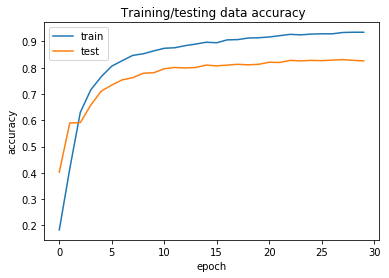

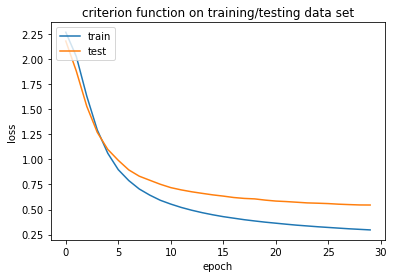

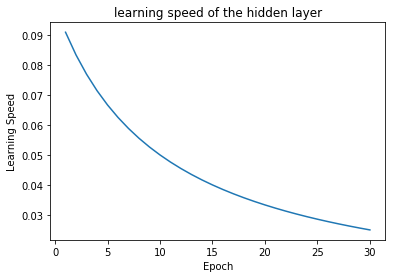

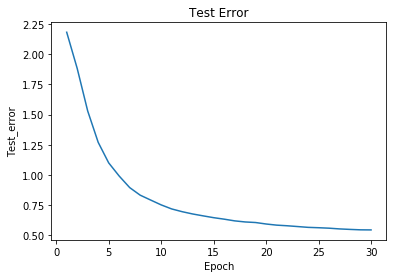

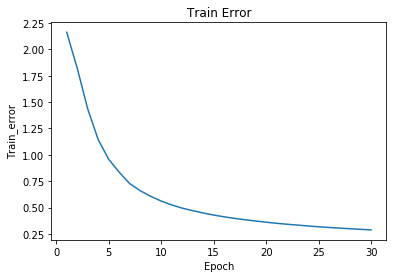

In [251]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title(' Training/testing data accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('criterion function on training/testing data set')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plotting learning speed 
Epoch_graph=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
plt.plot(Epoch_graph,learning_rate)
plt.xlabel('Epoch')
plt.ylabel('Learning Speed')
plt.title('learning speed of the hidden layer')
plt.show()

#plotting errors
#test error
plt.plot(Epoch_graph,loss_collected_test)
plt.xlabel('Epoch')
plt.ylabel('Test_error')
plt.title('Test Error')
plt.show()

#train error
plt.plot(Epoch_graph,loss_collected_train)
plt.xlabel('Epoch')
plt.ylabel('Train_error')
plt.title('Train Error')
plt.show()


### Single layer with regularizer

In [252]:
seed = 7
numpy.random.seed(seed)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

dats = {}
for i in range(0,10):
    temp_dat=np.zeros(shape=(100,784))
    temp2=X_train[y_train[:,]==i]
    temp_dat=temp2[0:100,:]
    dats[i] = (temp_dat)
X_train = np.concatenate((dats[0],dats[1],dats[2],dats[3],dats[4],dats[5],dats[6],dats[7],dats[8],dats[9]))

dats = {}
for i in range(0,10):
    temp_dat=np.zeros(shape=(100,784))
    temp2=X_test[y_test[:,]==i]
    temp_dat=temp2[0:100,:]
    dats[i] = (temp_dat)
X_test = np.concatenate((dats[0],dats[1],dats[2],dats[3],dats[4],dats[5],dats[6],dats[7],dats[8],dats[9]))

y_test = np.zeros(1000,)

for i in range(0,10):
    for j in range(0,100):
        y_test[(100*i)+j,]=i
  
y_train = np.zeros(1000,)

for i in range(0,10):
    for j in range(0,100):
        y_train[(100*i)+j,]=i


# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

learning_rate=[]
class Track_epochs(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        _lr = tf.to_float(optimizer.lr, name='ToFloat')
        _decay = tf.to_float(optimizer.decay, name='ToFloat')
        _iter = tf.to_float(optimizer.iterations, name='ToFloat')
        
        lr = K.eval(_lr * (1. / (1. + _decay * _iter)))
        learning_rate.append(lr)
        print(' - Learning Rate: {:.6f}\n'.format(lr))
#collecting test loss and accuracy in an array     
loss_collected_test=[]
acc_collected_test=[]
class History_test(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        loss_collected_test.append(loss)
        acc_collected_test.append(acc)
        
#collecting train loss and accuracy in an array     
loss_collected_train=[]
acc_collected_train=[]
class History_train(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        loss_collected_train.append(loss)
        acc_collected_train.append(acc)
        
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid',W_regularizer=l2(5)))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1,decay=0.001), metrics=['accuracy'])
    return model

# build the model
model = baseline_model()
# Fit the model

print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: print(model.layers[0].get_weights()))

callbacks_list = [Track_epochs(),History_test((X_test, y_test)),History_train((X_train, y_train))]


history=model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=30, batch_size=10,
verbose=2,callbacks = callbacks_list)


# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score is : %.2f%%" % (scores[1]*100))


C:\Users\manju\AppData\Local\conda\conda\envs\Python\lib\site-packages\ipykernel_launcher.py:90: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, kernel_initializer="normal", activation="sigmoid", kernel_regularizer=<keras.reg...)`
C:\Users\manju\AppData\Local\conda\conda\envs\Python\lib\site-packages\ipykernel_launcher.py:106: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_74 (Dense)             (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 1000 samples
Epoch 1/30
 - 1s - loss: 5.2460 - acc: 0.0970 - val_loss: 2.3091 - val_acc: 0.1050
 - Learning Rate: 0.090909

Epoch 2/30
 - 0s - loss: 2.3255 - acc: 0.0900 - val_loss: 2.3150 - val_acc: 0.1000
 - Learning Rate: 0.083333

Epoch 3/30
 - 0s - loss: 2.3191 - acc: 0.1080 - val_loss: 2.3199 - val_acc: 0.1000
 - Learning Rate: 0.076923

Epoch 4/30
 - 0s - loss: 2.3217 - acc: 0.0970 - val_loss: 2.3117 - val_acc: 0.1000
 - Learning Rate: 0.071429

Epoch 5/30
 - 0s - loss: 2.3244 - acc: 0.0

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


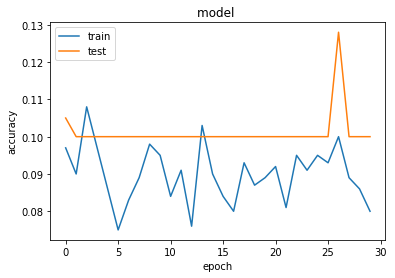

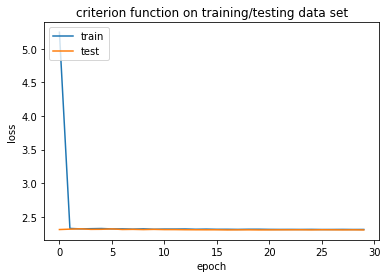

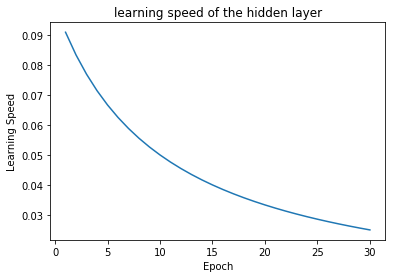

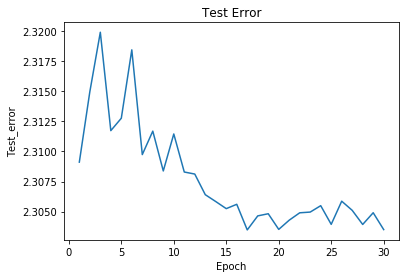

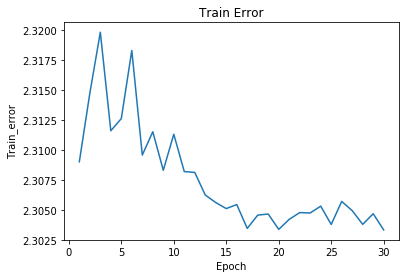

In [253]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('criterion function on training/testing data set')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plotting learning speed 
Epoch_graph=np.arange(1,31,1)
plt.plot(Epoch_graph,learning_rate)
plt.xlabel('Epoch')
plt.ylabel('Learning Speed')
plt.title('learning speed of the hidden layer')
plt.show()

#plotting errors
#test error
plt.plot(Epoch_graph,loss_collected_test)
plt.xlabel('Epoch')
plt.ylabel('Test_error')
plt.title('Test Error')
plt.show()

#train error
plt.plot(Epoch_graph,loss_collected_train)
plt.xlabel('Epoch')
plt.ylabel('Train_error')
plt.title('Train Error')
plt.show()

### Two layer with regularizer

In [254]:
seed = 7
numpy.random.seed(seed)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

dats = {}
for i in range(0,10):
    temp_dat=np.zeros(shape=(100,784))
    temp2=X_train[y_train[:,]==i]
    temp_dat=temp2[0:100,:]
    dats[i] = (temp_dat)
X_train = np.concatenate((dats[0],dats[1],dats[2],dats[3],dats[4],dats[5],dats[6],dats[7],dats[8],dats[9]))

dats = {}
for i in range(0,10):
    temp_dat=np.zeros(shape=(100,784))
    temp2=X_test[y_test[:,]==i]
    temp_dat=temp2[0:100,:]
    dats[i] = (temp_dat)
X_test = np.concatenate((dats[0],dats[1],dats[2],dats[3],dats[4],dats[5],dats[6],dats[7],dats[8],dats[9]))

y_test = np.zeros(1000,)

for i in range(0,10):
    for j in range(0,100):
        y_test[(100*i)+j,]=i
  
y_train = np.zeros(1000,)

for i in range(0,10):
    for j in range(0,100):
        y_train[(100*i)+j,]=i


# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

learning_rate=[]
class History_epochs(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        _lr = tf.to_float(optimizer.lr, name='ToFloat')
        _decay = tf.to_float(optimizer.decay, name='ToFloat')
        _iter = tf.to_float(optimizer.iterations, name='ToFloat')
        
        lr = K.eval(_lr * (1. / (1. + _decay * _iter)))
        learning_rate.append(lr)
        print(' - Learning Rate : {:.6f}\n'.format(lr))
#collecting test loss and accuracy in an array     
loss_collected_test=[]
acc_collected_test=[]
class History_test(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        loss_collected_test.append(loss)
        acc_collected_test.append(acc)
        
#collecting train loss and accuracy in an array     
loss_collected_train=[]
acc_collected_train=[]
class History_train(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        loss_collected_train.append(loss)
        acc_collected_train.append(acc)
        
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid',W_regularizer=l2(5)))
    model.add(Dense(30, kernel_initializer='normal', activation='sigmoid',W_regularizer=l2(5)))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1,decay=0.00001), metrics=['accuracy'])
    return model

# build the model
model = baseline_model()
# Fit the model

print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: print(model.layers[0].get_weights()))

callbacks_list = [History_epochs(),History_test((X_test, y_test)),History_train((X_train, y_train))]


history=model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=30, batch_size=10,
verbose=2,callbacks = callbacks_list)


# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score is : %.2f%%" % (scores[1]*100))

C:\Users\manju\AppData\Local\conda\conda\envs\Python\lib\site-packages\ipykernel_launcher.py:93: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, kernel_initializer="normal", activation="sigmoid", kernel_regularizer=<keras.reg...)`
C:\Users\manju\AppData\Local\conda\conda\envs\Python\lib\site-packages\ipykernel_launcher.py:94: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, kernel_initializer="normal", activation="sigmoid", kernel_regularizer=<keras.reg...)`
C:\Users\manju\AppData\Local\conda\conda\envs\Python\lib\site-packages\ipykernel_launcher.py:110: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_76 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_77 (Dense)             (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 1000 samples
Epoch 1/30
 - 1s - loss: 5.3596 - acc: 0.0800 - val_loss: 2.3066 - val_acc: 0.1000
 - Learning Rate : 0.099900

Epoch 2/30
 - 0s - loss: 2.3310 - acc: 0.0870 - val_loss: 2.3043 - val_acc: 0.1000
 - Learning Rate : 0.099800

Epoch 3/30
 - 0s - loss: 2.3285 - acc: 0.0720 - val_loss: 2.3117 - val_acc: 0.1000
 - Learning Rate : 0.099701

Epoch 4/30
 - 0s -

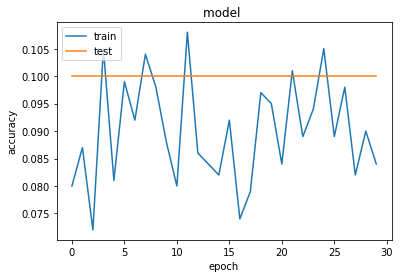

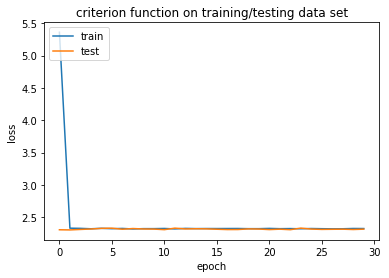

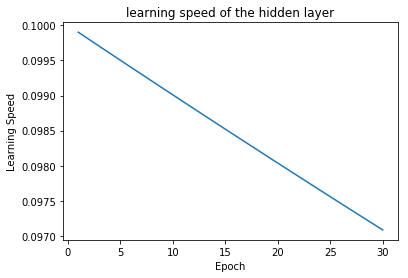

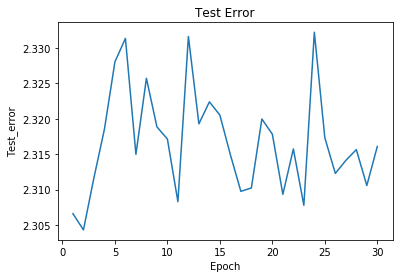

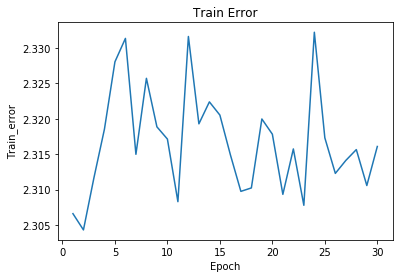

In [255]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('criterion function on training/testing data set')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plotting learning speed 
Epoch_graph=np.arange(1,31,1)
plt.plot(Epoch_graph,learning_rate)
plt.xlabel('Epoch')
plt.ylabel('Learning Speed')
plt.title('learning speed of the hidden layer')
plt.show()

#plotting errors
#test error
plt.plot(Epoch_graph,loss_collected_test)
plt.xlabel('Epoch')
plt.ylabel('Test_error')
plt.title('Test Error')
plt.show()

#train error
plt.plot(Epoch_graph,loss_collected_train)
plt.xlabel('Epoch')
plt.ylabel('Train_error')
plt.title('Train Error')
plt.show()

### Two layer without regularizer

In [256]:
seed = 7
numpy.random.seed(seed)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

dats = {}
for i in range(0,10):
    temp_dat=np.zeros(shape=(100,784))
    temp2=X_train[y_train[:,]==i]
    temp_dat=temp2[0:100,:]
    dats[i] = (temp_dat)
X_train = np.concatenate((dats[0],dats[1],dats[2],dats[3],dats[4],dats[5],dats[6],dats[7],dats[8],dats[9]))

dats = {}
for i in range(0,10):
    temp_dat=np.zeros(shape=(100,784))
    temp2=X_test[y_test[:,]==i]
    temp_dat=temp2[0:100,:]
    dats[i] = (temp_dat)
X_test = np.concatenate((dats[0],dats[1],dats[2],dats[3],dats[4],dats[5],dats[6],dats[7],dats[8],dats[9]))

y_test = np.zeros(1000,)

for i in range(0,10):
    for j in range(0,100):
        y_test[(100*i)+j,]=i
  
y_train = np.zeros(1000,)

for i in range(0,10):
    for j in range(0,100):
        y_train[(100*i)+j,]=i


# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

learning_rate=[]
class History_epochs(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        _lr = tf.to_float(optimizer.lr, name='ToFloat')
        _decay = tf.to_float(optimizer.decay, name='ToFloat')
        _iter = tf.to_float(optimizer.iterations, name='ToFloat')
        
        lr = K.eval(_lr * (1. / (1. + _decay * _iter)))
        learning_rate.append(lr)
        print(' - Learning Rate: {:.6f}\n'.format(lr))
#collecting test loss and accuracy in an array     
loss_collected_test=[]
acc_collected_test=[]
class History_test(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        loss_collected_test.append(loss)
        acc_collected_test.append(acc)
        
#collecting train loss and accuracy in an array     
loss_collected_train=[]
acc_collected_train=[]
class History_train(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        loss_collected_train.append(loss)
        acc_collected_train.append(acc)
        
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(30, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1,decay=0.00001), metrics=['accuracy'])
    return model

# build the model
model = baseline_model()
# Fit the model

print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: print(model.layers[0].get_weights()))

callbacks_list = [History_epochs(),History_test((X_test, y_test)),History_train((X_train, y_train))]


history=model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=30, batch_size=10,
verbose=2,callbacks = callbacks_list)


# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score is : %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_79 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_80 (Dense)             (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________


C:\Users\manju\AppData\Local\conda\conda\envs\Python\lib\site-packages\ipykernel_launcher.py:107: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1000 samples, validate on 1000 samples
Epoch 1/30
 - 1s - loss: 2.3277 - acc: 0.0860 - val_loss: 2.3051 - val_acc: 0.1000
 - Learning Rate: 0.099900

Epoch 2/30
 - 0s - loss: 2.3275 - acc: 0.0870 - val_loss: 2.3023 - val_acc: 0.1000
 - Learning Rate: 0.099800

Epoch 3/30
 - 0s - loss: 2.3236 - acc: 0.0770 - val_loss: 2.3075 - val_acc: 0.1000
 - Learning Rate: 0.099701

Epoch 4/30
 - 0s - loss: 2.3164 - acc: 0.1050 - val_loss: 2.3122 - val_acc: 0.1000
 - Learning Rate: 0.099602

Epoch 5/30
 - 0s - loss: 2.3199 - acc: 0.0740 - val_loss: 2.3154 - val_acc: 0.1000
 - Learning Rate: 0.099502

Epoch 6/30
 - 0s - loss: 2.3122 - acc: 0.1000 - val_loss: 2.3163 - val_acc: 0.1000
 - Learning Rate: 0.099404

Epoch 7/30
 - 0s - loss: 2.3116 - acc: 0.0980 - val_loss: 2.2983 - val_acc: 0.2000
 - Learning Rate: 0.099305

Epoch 8/30
 - 0s - loss: 2.2981 - acc: 0.1220 - val_loss: 2.3030 - val_acc: 0.1000
 - Learning Rate: 0.099206

Epoch 9/30
 - 0s - loss: 2.2921 - acc: 0.1240 - val_loss: 2.2810

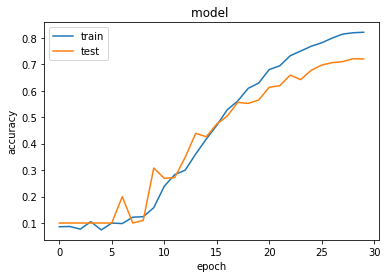

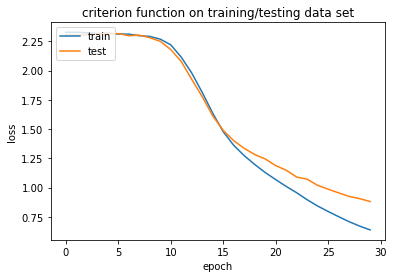

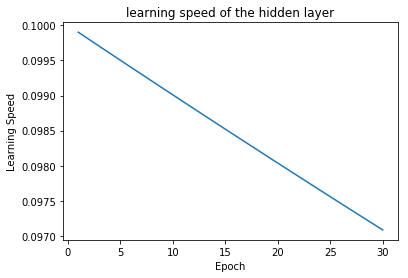

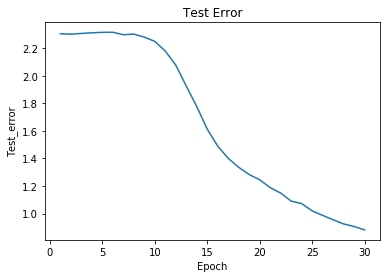

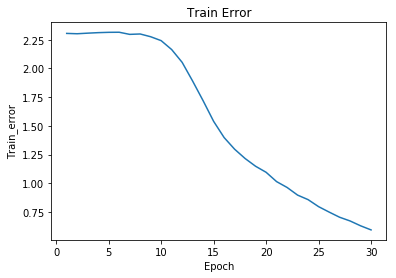

In [257]:

    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model ')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('criterion function on training/testing data set')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    #plotting learning speed 
    Epoch_graph=np.arange(1,31,1)
    plt.plot(Epoch_graph,learning_rate)
    plt.xlabel('Epoch')
    plt.ylabel('Learning Speed')
    plt.title('learning speed of the hidden layer')
    plt.show()

    #plotting errors
    #test error
    plt.plot(Epoch_graph,loss_collected_test)
    plt.xlabel('Epoch')
    plt.ylabel('Test_error')
    plt.title('Test Error')
    plt.show()

    #train error
    plt.plot(Epoch_graph,loss_collected_train)
    plt.xlabel('Epoch')
    plt.ylabel('Train_error')
    plt.title('Train Error')
    plt.show()

### Three layer without regularizer

In [258]:
seed = 50286752
numpy.random.seed(seed)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

dats = {}
for i in range(0,10):
    temp_dat=np.zeros(shape=(100,784))
    temp2=X_train[y_train[:,]==i]
    temp_dat=temp2[0:100,:]
    dats[i] = (temp_dat)
X_train = np.concatenate((dats[0],dats[1],dats[2],dats[3],dats[4],dats[5],dats[6],dats[7],dats[8],dats[9]))

dats = {}
for i in range(0,10):
    temp_dat=np.zeros(shape=(100,784))
    temp2=X_test[y_test[:,]==i]
    temp_dat=temp2[0:100,:]
    dats[i] = (temp_dat)
X_test = np.concatenate((dats[0],dats[1],dats[2],dats[3],dats[4],dats[5],dats[6],dats[7],dats[8],dats[9]))

y_test = np.zeros(1000,)

for i in range(0,10):
    for j in range(0,100):
        y_test[(100*i)+j,]=i
  
y_train = np.zeros(1000,)

for i in range(0,10):
    for j in range(0,100):
        y_train[(100*i)+j,]=i


# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

learning_rate=[]
class History_epochs(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        _lr = tf.to_float(optimizer.lr, name='ToFloat')
        _decay = tf.to_float(optimizer.decay, name='ToFloat')
        _iter = tf.to_float(optimizer.iterations, name='ToFloat')
        
        lr = K.eval(_lr * (1. / (1. + _decay * _iter)))
        learning_rate.append(lr)
        print(' - Learning Rate : {:.6f}\n'.format(lr))
#collecting test loss and accuracy in an array     
loss_collected_test=[]
acc_collected_test=[]
class History_test(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        loss_collected_test.append(loss)
        acc_collected_test.append(acc)
        
#collecting train loss and accuracy in an array     
loss_collected_train=[]
acc_collected_train=[]
class History_train(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        loss_collected_train.append(loss)
        acc_collected_train.append(acc)
        
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(30, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(30, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1,decay=0.00001), metrics=['accuracy'])
    return model

# build the model
model = baseline_model()
# Fit the model

print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: print(model.layers[0].get_weights()))

callbacks_list = [History_epochs(),History_test((X_test, y_test)),History_train((X_train, y_train))]


history=model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=30, batch_size=10,
verbose=2,callbacks = callbacks_list)


# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score is : %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_82 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_83 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_84 (Dense)             (None, 10)                310       
Total params: 25,720
Trainable params: 25,720
Non-trainable params: 0
_________________________________________________________________


C:\Users\manju\AppData\Local\conda\conda\envs\Python\lib\site-packages\ipykernel_launcher.py:108: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1000 samples, validate on 1000 samples
Epoch 1/30
 - 1s - loss: 2.3289 - acc: 0.0830 - val_loss: 2.3068 - val_acc: 0.1000
 - Learning Rate : 0.099900

Epoch 2/30
 - 0s - loss: 2.3317 - acc: 0.0820 - val_loss: 2.3093 - val_acc: 0.1000
 - Learning Rate : 0.099800

Epoch 3/30
 - 0s - loss: 2.3299 - acc: 0.0790 - val_loss: 2.3076 - val_acc: 0.1000
 - Learning Rate : 0.099701

Epoch 4/30
 - 0s - loss: 2.3225 - acc: 0.0980 - val_loss: 2.3170 - val_acc: 0.1000
 - Learning Rate : 0.099602

Epoch 5/30
 - 0s - loss: 2.3268 - acc: 0.0940 - val_loss: 2.3195 - val_acc: 0.1000
 - Learning Rate : 0.099502

Epoch 6/30
 - 0s - loss: 2.3192 - acc: 0.0990 - val_loss: 2.3253 - val_acc: 0.1000
 - Learning Rate : 0.099404

Epoch 7/30
 - 0s - loss: 2.3252 - acc: 0.0990 - val_loss: 2.3055 - val_acc: 0.1000
 - Learning Rate : 0.099305

Epoch 8/30
 - 0s - loss: 2.3222 - acc: 0.0810 - val_loss: 2.3088 - val_acc: 0.1000
 - Learning Rate : 0.099206

Epoch 9/30
 - 0s - loss: 2.3171 - acc: 0.0880 - val_loss

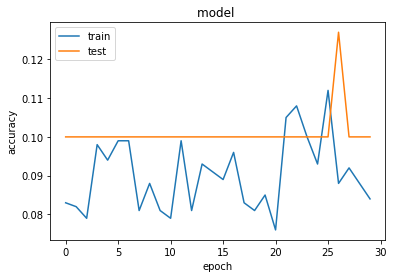

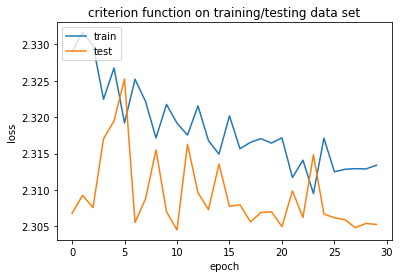

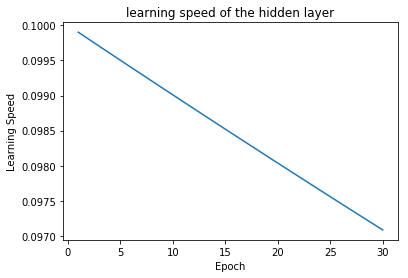

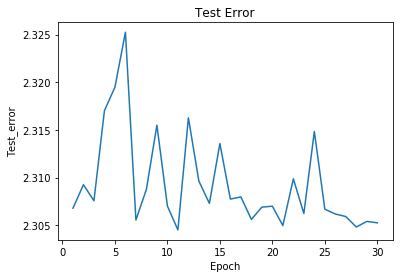

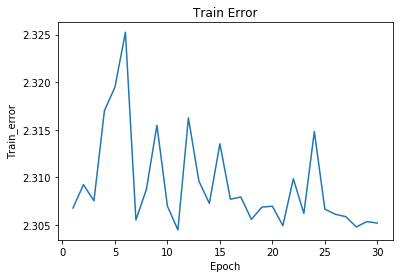

In [259]:

    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model ')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('criterion function on training/testing data set')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    #plotting learning speed 
    Epoch_graph=np.arange(1,31,1)
    plt.plot(Epoch_graph,learning_rate)
    plt.xlabel('Epoch')
    plt.ylabel('Learning Speed')
    plt.title('learning speed of the hidden layer')
    plt.show()

    #plotting errors
    #test error
    plt.plot(Epoch_graph,loss_collected_test)
    plt.xlabel('Epoch')
    plt.ylabel('Test_error')
    plt.title('Test Error')
    plt.show()

    #train error
    plt.plot(Epoch_graph,loss_collected_train)
    plt.xlabel('Epoch')
    plt.ylabel('Train_error')
    plt.title('Train Error')
    plt.show()

### Three layer with regularizer

In [260]:
seed = 50286752
numpy.random.seed(seed)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

dats = {}
for i in range(0,10):
    temp_dat=np.zeros(shape=(100,784))
    temp2=X_train[y_train[:,]==i]
    temp_dat=temp2[0:100,:]
    dats[i] = (temp_dat)
X_train = np.concatenate((dats[0],dats[1],dats[2],dats[3],dats[4],dats[5],dats[6],dats[7],dats[8],dats[9]))

dats = {}
for i in range(0,10):
    temp_dat=np.zeros(shape=(100,784))
    temp2=X_test[y_test[:,]==i]
    temp_dat=temp2[0:100,:]
    dats[i] = (temp_dat)
X_test = np.concatenate((dats[0],dats[1],dats[2],dats[3],dats[4],dats[5],dats[6],dats[7],dats[8],dats[9]))

y_test = np.zeros(1000,)

for i in range(0,10):
    for j in range(0,100):
        y_test[(100*i)+j,]=i
  
y_train = np.zeros(1000,)

for i in range(0,10):
    for j in range(0,100):
        y_train[(100*i)+j,]=i


# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

learning_rate=[]
class History_epochs(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        _lr = tf.to_float(optimizer.lr, name='ToFloat')
        _decay = tf.to_float(optimizer.decay, name='ToFloat')
        _iter = tf.to_float(optimizer.iterations, name='ToFloat')
        
        lr = K.eval(_lr * (1. / (1. + _decay * _iter)))
        learning_rate.append(lr)
        print(' - Learning Rate : {:.6f}\n'.format(lr))
#collecting test loss and accuracy in an array     
loss_collected_test=[]
acc_collected_test=[]
class History_test(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        loss_collected_test.append(loss)
        acc_collected_test.append(acc)
        
#collecting train loss and accuracy in an array     
loss_collected_train=[]
acc_collected_train=[]
class History_train(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        loss_collected_train.append(loss)
        acc_collected_train.append(acc)
        
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid',W_regularizer=l2(5)))
    model.add(Dense(30, kernel_initializer='normal', activation='sigmoid',W_regularizer=l2(5)))
    model.add(Dense(30, kernel_initializer='normal', activation='sigmoid',W_regularizer=l2(5)))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1,decay=0.00001), metrics=['accuracy'])
    return model

# build the model
model = baseline_model()
# Fit the model

print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: print(model.layers[0].get_weights()))

callbacks_list = [History_epochs(),History_test((X_test, y_test)),History_train((X_train, y_train))]


history=model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=30, batch_size=10,
verbose=2,callbacks = callbacks_list)


# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score is : %.2f%%" % (scores[1]*100))

C:\Users\manju\AppData\Local\conda\conda\envs\Python\lib\site-packages\ipykernel_launcher.py:90: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, kernel_initializer="normal", activation="sigmoid", kernel_regularizer=<keras.reg...)`
C:\Users\manju\AppData\Local\conda\conda\envs\Python\lib\site-packages\ipykernel_launcher.py:91: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, kernel_initializer="normal", activation="sigmoid", kernel_regularizer=<keras.reg...)`
C:\Users\manju\AppData\Local\conda\conda\envs\Python\lib\site-packages\ipykernel_launcher.py:92: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, kernel_initializer="normal", activation="sigmoid", kernel_regularizer=<keras.reg...)`
C:\Users\manju\AppData\Local\conda\conda\envs\Python\lib\site-packages\ipykernel_launcher.py:108: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_86 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_87 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_88 (Dense)             (None, 10)                310       
Total params: 25,720
Trainable params: 25,720
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 1000 samples
Epoch 1/30
 - 1s - loss: 5.4696 - acc: 0.0830 - val_loss: 2.3072 - val_acc: 0.1000
 - Learning Rate : 0.099900

Epoch 2/30
 - 0s - loss: 2.3325 - acc: 0.0800 - val_loss: 2.3098 - val_acc: 0.1000
 - Learning Rate : 0.099800

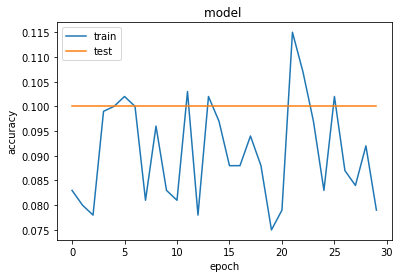

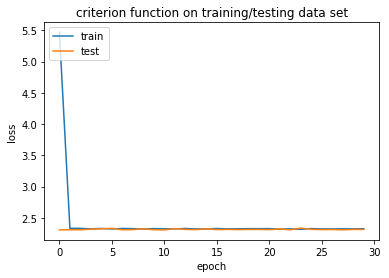

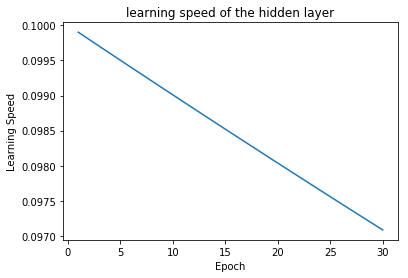

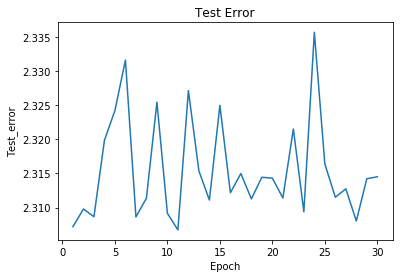

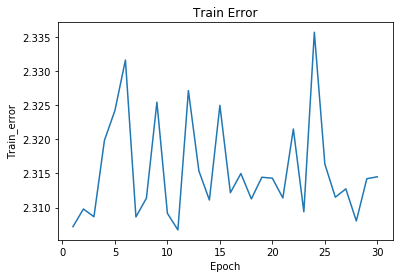

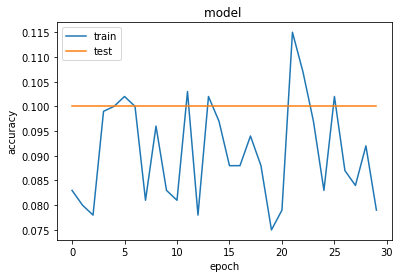

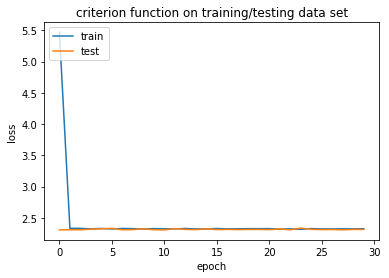

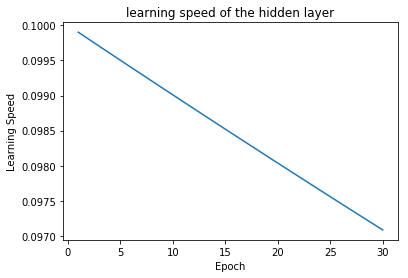

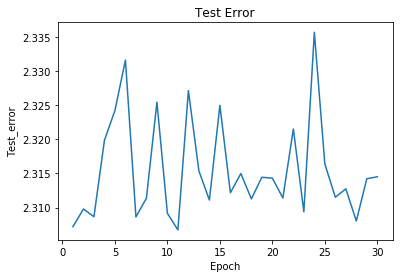

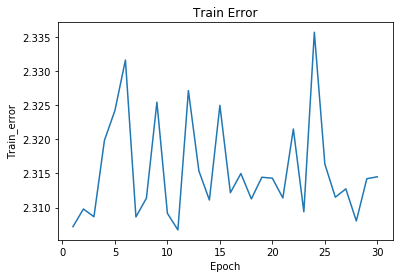

In [261]:

    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model ')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('criterion function on training/testing data set')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    #plotting learning speed 
    Epoch_graph=np.arange(1,31,1)
    plt.plot(Epoch_graph,learning_rate)
    plt.xlabel('Epoch')
    plt.ylabel('Learning Speed')
    plt.title('learning speed of the hidden layer')
    plt.show()

    #plotting errors
    #test error
    plt.plot(Epoch_graph,loss_collected_test)
    plt.xlabel('Epoch')
    plt.ylabel('Test_error')
    plt.title('Test Error')
    plt.show()

    #train error
    plt.plot(Epoch_graph,loss_collected_train)
    plt.xlabel('Epoch')
    plt.ylabel('Train_error')
    plt.title('Train Error')
    plt.show()
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model ')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('criterion function on training/testing data set')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    #plotting learning speed 
    Epoch_graph=np.arange(1,31,1)
    plt.plot(Epoch_graph,learning_rate)
    plt.xlabel('Epoch')
    plt.ylabel('Learning Speed')
    plt.title('learning speed of the hidden layer')
    plt.show()

    #plotting errors
    #test error
    plt.plot(Epoch_graph,loss_collected_test)
    plt.xlabel('Epoch')
    plt.ylabel('Test_error')
    plt.title('Test Error')
    plt.show()

    #train error
    plt.plot(Epoch_graph,loss_collected_train)
    plt.xlabel('Epoch')
    plt.ylabel('Train_error')
    plt.title('Train Error')
    plt.show()

### Using CNN without dropout

In [262]:
seed = 50286752
numpy.random.seed(seed)

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN score: %.2f%%" % (scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 21s - loss: 0.2327 - acc: 0.9344 - val_loss: 0.0810 - val_acc: 0.9755
Epoch 2/10
 - 20s - loss: 0.0667 - acc: 0.9802 - val_loss: 0.0670 - val_acc: 0.9785
Epoch 3/10
 - 19s - loss: 0.0457 - acc: 0.9860 - val_loss: 0.0423 - val_acc: 0.9861
Epoch 4/10
 - 19s - loss: 0.0352 - acc: 0.9893 - val_loss: 0.0409 - val_acc: 0.9862
Epoch 5/10
 - 19s - loss: 0.0290 - acc: 0.9909 - val_loss: 0.0422 - val_acc: 0.9866
Epoch 6/10
 - 19s - loss: 0.0221 - acc: 0.9934 - val_loss: 0.0375 - val_acc: 0.9877
Epoch 7/10
 - 19s - loss: 0.0176 - acc: 0.9948 - val_loss: 0.0370 - val_acc: 0.9879
Epoch 8/10
 - 19s - loss: 0.0134 - acc: 0.9960 - val_loss: 0.0394 - val_acc: 0.9874
Epoch 9/10
 - 19s - loss: 0.0102 - acc: 0.9970 - val_loss: 0.0413 - val_acc: 0.9872
Epoch 10/10
 - 20s - loss: 0.0102 - acc: 0.9969 - val_loss: 0.0358 - val_acc: 0.9883
CNN score: 98.83%


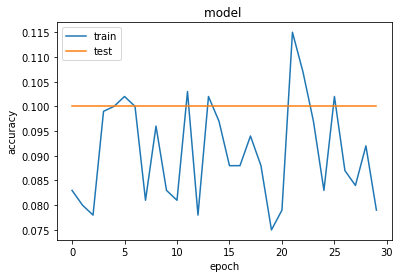

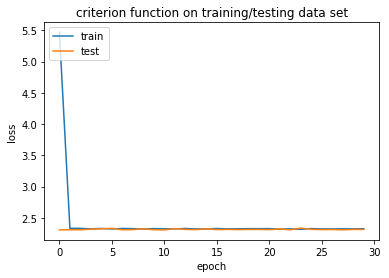

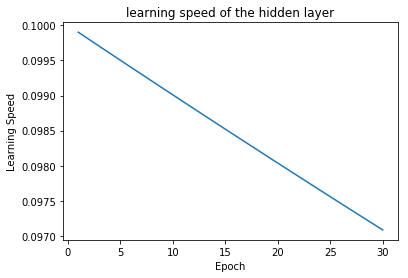

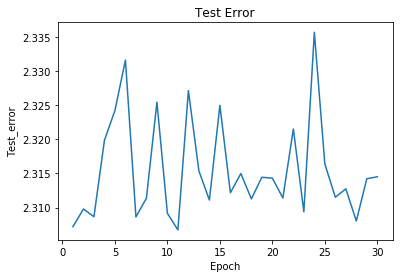

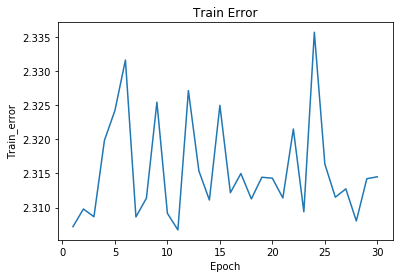

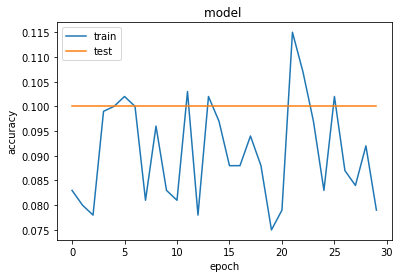

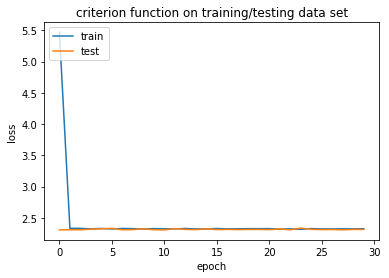

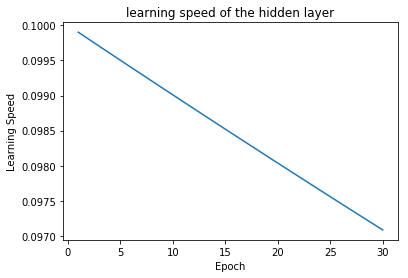

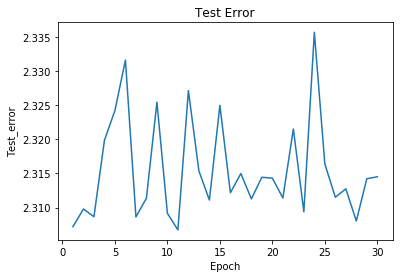

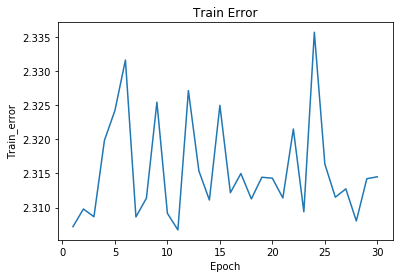

In [263]:

    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model ')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('criterion function on training/testing data set')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    #plotting learning speed 
    Epoch_graph=np.arange(1,31,1)
    plt.plot(Epoch_graph,learning_rate)
    plt.xlabel('Epoch')
    plt.ylabel('Learning Speed')
    plt.title('learning speed of the hidden layer')
    plt.show()

    #plotting errors
    #test error
    plt.plot(Epoch_graph,loss_collected_test)
    plt.xlabel('Epoch')
    plt.ylabel('Test_error')
    plt.title('Test Error')
    plt.show()

    #train error
    plt.plot(Epoch_graph,loss_collected_train)
    plt.xlabel('Epoch')
    plt.ylabel('Train_error')
    plt.title('Train Error')
    plt.show()
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model ')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('criterion function on training/testing data set')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    #plotting learning speed 
    Epoch_graph=np.arange(1,31,1)
    plt.plot(Epoch_graph,learning_rate)
    plt.xlabel('Epoch')
    plt.ylabel('Learning Speed')
    plt.title('learning speed of the hidden layer')
    plt.show()

    #plotting errors
    #test error
    plt.plot(Epoch_graph,loss_collected_test)
    plt.xlabel('Epoch')
    plt.ylabel('Test_error')
    plt.title('Test Error')
    plt.show()

    #train error
    plt.plot(Epoch_graph,loss_collected_train)
    plt.xlabel('Epoch')
    plt.ylabel('Train_error')
    plt.title('Train Error')
    plt.show()

### using CNN with dropout

In [269]:
seed = 50286752
numpy.random.seed(seed)

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Score: %.2f%%" % (scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 31s - loss: 0.2451 - acc: 0.9290 - val_loss: 0.0784 - val_acc: 0.9769
Epoch 2/10
 - 23s - loss: 0.0778 - acc: 0.9765 - val_loss: 0.0540 - val_acc: 0.9839
Epoch 3/10
 - 24s - loss: 0.0554 - acc: 0.9824 - val_loss: 0.0480 - val_acc: 0.9850
Epoch 4/10
 - 23s - loss: 0.0440 - acc: 0.9861 - val_loss: 0.0356 - val_acc: 0.9885
Epoch 5/10
 - 23s - loss: 0.0360 - acc: 0.9889 - val_loss: 0.0349 - val_acc: 0.9887
Epoch 6/10
 - 24s - loss: 0.0322 - acc: 0.9901 - val_loss: 0.0332 - val_acc: 0.9880
Epoch 7/10
 - 22s - loss: 0.0266 - acc: 0.9915 - val_loss: 0.0311 - val_acc: 0.9900
Epoch 8/10
 - 23s - loss: 0.0228 - acc: 0.9925 - val_loss: 0.0358 - val_acc: 0.9879
Epoch 9/10
 - 22s - loss: 0.0205 - acc: 0.9933 - val_loss: 0.0303 - val_acc: 0.9903
Epoch 10/10
 - 22s - loss: 0.0188 - acc: 0.9938 - val_loss: 0.0295 - val_acc: 0.9902
CNN Score: 99.02%


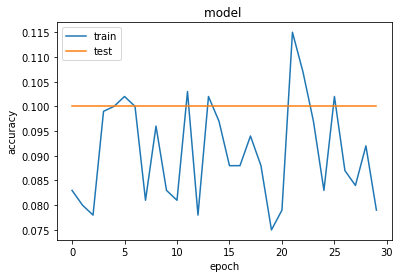

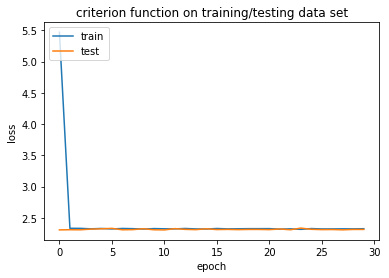

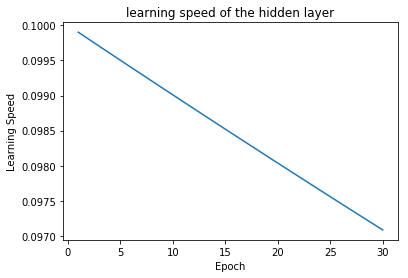

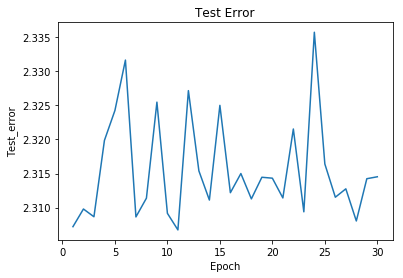

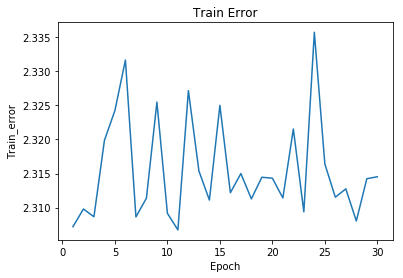

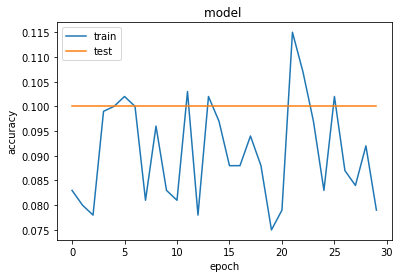

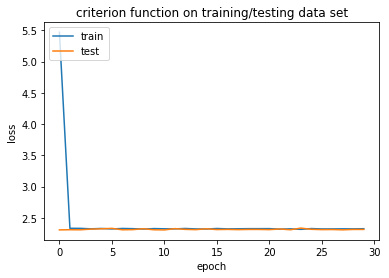

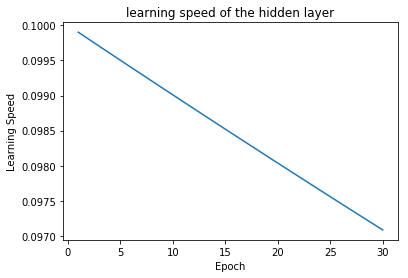

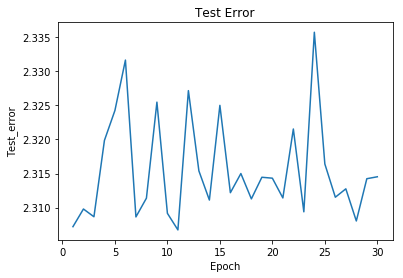

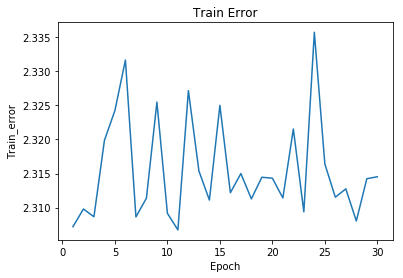

In [270]:

    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model ')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('criterion function on training/testing data set')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    #plotting learning speed 
    Epoch_graph=np.arange(1,31,1)
    plt.plot(Epoch_graph,learning_rate)
    plt.xlabel('Epoch')
    plt.ylabel('Learning Speed')
    plt.title('learning speed of the hidden layer')
    plt.show()

    #plotting errors
    #test error
    plt.plot(Epoch_graph,loss_collected_test)
    plt.xlabel('Epoch')
    plt.ylabel('Test_error')
    plt.title('Test Error')
    plt.show()

    #train error
    plt.plot(Epoch_graph,loss_collected_train)
    plt.xlabel('Epoch')
    plt.ylabel('Train_error')
    plt.title('Train Error')
    plt.show()
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model ')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('criterion function on training/testing data set')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    #plotting learning speed 
    Epoch_graph=np.arange(1,31,1)
    plt.plot(Epoch_graph,learning_rate)
    plt.xlabel('Epoch')
    plt.ylabel('Learning Speed')
    plt.title('learning speed of the hidden layer')
    plt.show()

    #plotting errors
    #test error
    plt.plot(Epoch_graph,loss_collected_test)
    plt.xlabel('Epoch')
    plt.ylabel('Test_error')
    plt.title('Test Error')
    plt.show()

    #train error
    plt.plot(Epoch_graph,loss_collected_train)
    plt.xlabel('Epoch')
    plt.ylabel('Train_error')
    plt.title('Train Error')
    plt.show()

### Rotating the image 1-3 degrees,colckwise and counter clockwise with 3 pixel shift in 8 directions

In [266]:
import numpy
import tensorflow as tf
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import keras
import keras.backend as K
from keras.callbacks import LambdaCallback
from scipy.ndimage import rotate
from scipy.misc import face

seed = 50286752
numpy.random.seed(seed)

(X_train, y_train), (X_test, y_test) = mnist.load_data()
for i in range(0,60000):
    #anticlockwise rotation
    rot = rotate(X_train[i], 3, reshape=False)
    #left shift
    for k in range(14,17):
        temp=rot[k][0]
        for l in range(27):
            rot[k][l]=rot[k][l+1]
        rot[k][27]=temp
    #right shift    
    for k in range(22,25):
        temp=rot[k][27]
        for l in range(27):
            rot[k][27-l]=rot[k][27-l-1]
        rot[k][0]=temp
    #top shift    
    for k in range(17,20):
        temp=rot[0][k]
        for l in range(27):
            rot[l][k]=rot[l+1][k]
        rot[27][k]=temp
    #bottom shift    
    for k in range(14,17):
        temp=rot[27][k]
        for l in range(27):
            rot[27-l][k]=rot[27-l-1][k]
        rot[0][k]=temp
    #second diagonal shift left
    b=[]
    for i in range(0,28):
        b.append(rot[27-i][i])
    temp=b[0]
    for i in range(0,5):
        b[i]=b[i+1]
    b[5]=temp
    for i in range(0,28):
        rot[27-i][i]=b[i]   
    #first diagonal shift left
    c=[]
    for i in range(0,28):
        c.append(rot[i][i])
    temp=c[0]
    for i in range(0,27):
        c[i]=c[i+1]
    c[27]=temp
    for i in range(0,28):
        rot[i][i]=c[i]
    #second diagonal shift right
    temp=b[27]
    for i in range(0,27):
        b[27-i]=b[27-i-1]
    b[0]=temp
    for i in range(0,28):
        rot[27-i][i]=b[i]
    #first diagonal rotation right
    temp=c[27]
    for i in range(0,27):
        c[27-i]=c[27-i-1]
    c[0]=temp
    for i in range(0,28):
        rot[i][i]=c[i]
    X_train[i]=rot[i]
for i in range(0,10000):
    rot1 = rotate(X_test[i], 10, reshape=False)
    #left shift
    for k in range(22,25):
        temp=rot1[k][0]
        for l in range(27):
            rot1[k][l]=rot1[k][l+1]
        rot1[k][27]=temp
    #right shift    
    for k in range(22,25):
        temp=rot1[k][27]
        for l in range(27):
            rot1[k][27-l]=rot1[k][27-l-1]
        rot1[k][0]=temp
    #top shift    
    for k in range(22,25):
        temp=rot1[0][k]
        for l in range(27):
            rot1[l][k]=rot1[l+1][k]
        rot1[27][k]=temp
    #bottom shift    
    for k in range(22,25):
        temp=rot1[27][k]
        for l in range(27):
            rot1[27-l][k]=rot1[27-l-1][k]
        rot1[0][k]=temp
    #second diagonal shift left
    b=[]
    for i in range(0,28):
        b.append(rot1[27-i][i])
    temp=b[0]
    for i in range(0,5):
        b[i]=b[i+1]
    b[5]=temp
    for i in range(0,28):
        rot1[27-i][i]=b[i]
    #second diagonal shift right
    temp=b[27]
    for i in range(0,27):
        b[27-i]=b[27-i-1]
    b[0]=temp
    for i in range(0,28):
        rot1[27-i][i]=b[i]
    #first diagonal shift left
    c=[]
    for i in range(0,28):
        c.append(rot1[i][i])
    temp=c[0]
    for i in range(0,27):
        c[i]=c[i+1]
    c[27]=temp
    for i in range(0,28):
        rot1[i][i]=c[i]
    #first diagonal shift right
    temp=c[27]
    for i in range(0,27):
        c[27-i]=c[27-i-1]
    c[0]=temp
    for i in range(0,28):
        rot1[i][i]=c[i]
    X_train[i]=rot1[i]

In [267]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

dats = {}
for i in range(0,10):
    temp_dat=np.zeros(shape=(100,784))
    temp2=X_train[y_train[:,]==i]
    temp_dat=temp2[0:100,:]
    dats[i] = (temp_dat)
X_train = np.concatenate((dats[0],dats[1],dats[2],dats[3],dats[4],dats[5],dats[6],dats[7],dats[8],dats[9]))

dats = {}
for i in range(0,10):
    temp_dat=np.zeros(shape=(100,784))
    temp2=X_test[y_test[:,]==i]
    temp_dat=temp2[0:100,:]
    dats[i] = (temp_dat)
X_test = np.concatenate((dats[0],dats[1],dats[2],dats[3],dats[4],dats[5],dats[6],dats[7],dats[8],dats[9]))

y_test = np.zeros(1000,)

for i in range(0,10):
    for j in range(0,100):
        y_test[(100*i)+j,]=i
  
y_train = np.zeros(1000,)

for i in range(0,10):
    for j in range(0,100):
        y_train[(100*i)+j,]=i


# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

learning_rate=[]
class History_epochs(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        _lr = tf.to_float(optimizer.lr, name='ToFloat')
        _decay = tf.to_float(optimizer.decay, name='ToFloat')
        _iter = tf.to_float(optimizer.iterations, name='ToFloat')
        
        lr = K.eval(_lr * (1. / (1. + _decay * _iter)))
        learning_rate.append(lr)
        print(' - Learning Rate : {:.6f}\n'.format(lr))
#collecting test loss and accuracy in an array     
loss_collected_test=[]
acc_collected_test=[]
class History_test(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        loss_collected_test.append(loss)
        acc_collected_test.append(acc)
        
#collecting train loss and accuracy in an array     
loss_collected_train=[]
acc_collected_train=[]
class History_train(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        loss_collected_train.append(loss)
        acc_collected_train.append(acc)
        
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid',W_regularizer=l2(5)))
    model.add(Dense(30, kernel_initializer='normal', activation='sigmoid',W_regularizer=l2(5)))
    model.add(Dense(30, kernel_initializer='normal', activation='sigmoid',W_regularizer=l2(5)))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1,decay=0.00001), metrics=['accuracy'])
    return model

# build the model
model = baseline_model()
# Fit the model

print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: print(model.layers[0].get_weights()))

callbacks_list = [History_epochs(),History_test((X_test, y_test)),History_train((X_train, y_train))]


history=model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=30, batch_size=10,
verbose=2,callbacks = callbacks_list)


# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score is : %.2f%%" % (100-scores[1]*100))

C:\Users\manju\AppData\Local\conda\conda\envs\Python\lib\site-packages\ipykernel_launcher.py:84: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=784, kernel_initializer="normal", activation="sigmoid", kernel_regularizer=<keras.reg...)`
C:\Users\manju\AppData\Local\conda\conda\envs\Python\lib\site-packages\ipykernel_launcher.py:85: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, kernel_initializer="normal", activation="sigmoid", kernel_regularizer=<keras.reg...)`
C:\Users\manju\AppData\Local\conda\conda\envs\Python\lib\site-packages\ipykernel_launcher.py:86: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, kernel_initializer="normal", activation="sigmoid", kernel_regularizer=<keras.reg...)`
C:\Users\manju\AppData\Local\conda\conda\envs\Python\lib\site-packages\ipykernel_launcher.py:102: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_94 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_95 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_96 (Dense)             (None, 10)                310       
Total params: 25,720
Trainable params: 25,720
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 1000 samples
Epoch 1/30
 - 1s - loss: 5.4696 - acc: 0.0830 - val_loss: 2.3072 - val_acc: 0.1000
 - Learning Rate : 0.099900

Epoch 2/30
 - 0s - loss: 2.3325 - acc: 0.0800 - val_loss: 2.3098 - val_acc: 0.1000
 - Learning Rate : 0.099800

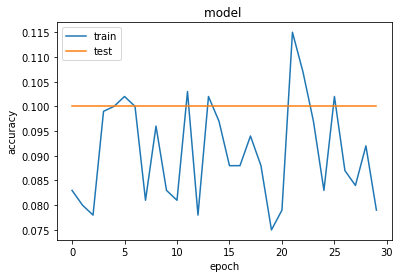

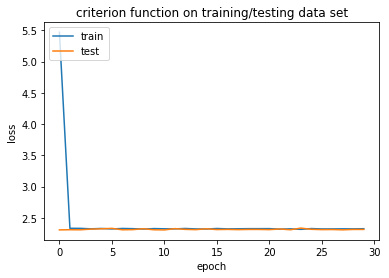

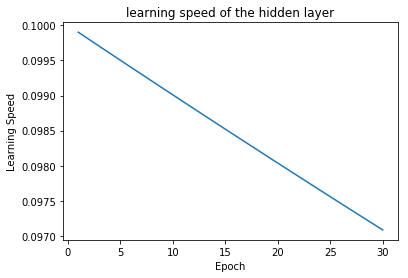

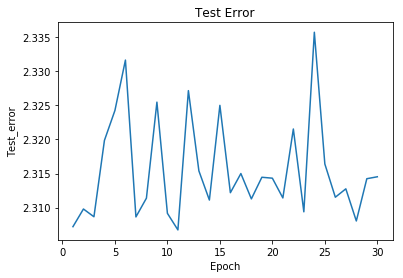

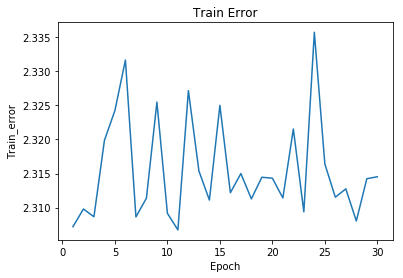

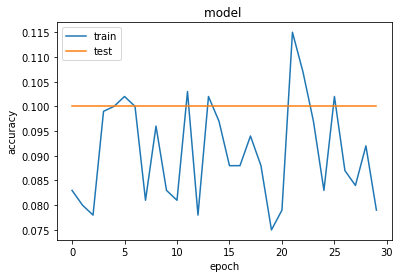

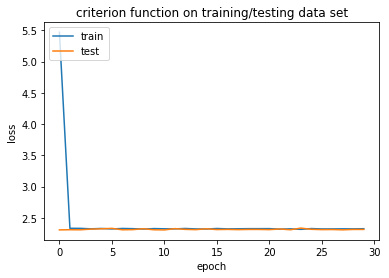

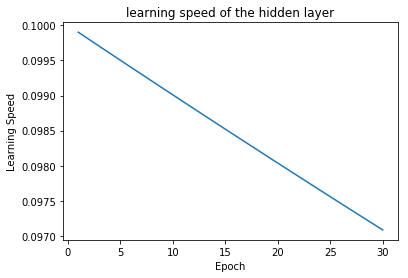

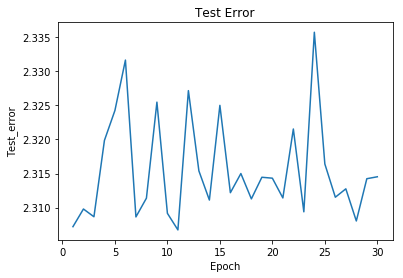

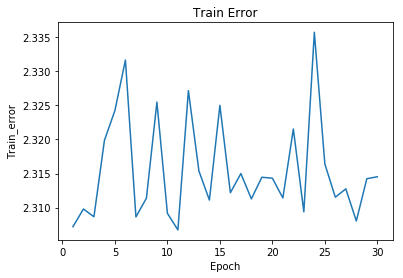

In [268]:

    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model ')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('criterion function on training/testing data set')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    #plotting learning speed 
    Epoch_graph=np.arange(1,31,1)
    plt.plot(Epoch_graph,learning_rate)
    plt.xlabel('Epoch')
    plt.ylabel('Learning Speed')
    plt.title('learning speed of the hidden layer')
    plt.show()

    #plotting errors
    #test error
    plt.plot(Epoch_graph,loss_collected_test)
    plt.xlabel('Epoch')
    plt.ylabel('Test_error')
    plt.title('Test Error')
    plt.show()

    #train error
    plt.plot(Epoch_graph,loss_collected_train)
    plt.xlabel('Epoch')
    plt.ylabel('Train_error')
    plt.title('Train Error')
    plt.show()
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model ')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('criterion function on training/testing data set')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    #plotting learning speed 
    Epoch_graph=np.arange(1,31,1)
    plt.plot(Epoch_graph,learning_rate)
    plt.xlabel('Epoch')
    plt.ylabel('Learning Speed')
    plt.title('learning speed of the hidden layer')
    plt.show()

    #plotting errors
    #test error
    plt.plot(Epoch_graph,loss_collected_test)
    plt.xlabel('Epoch')
    plt.ylabel('Test_error')
    plt.title('Test Error')
    plt.show()

    #train error
    plt.plot(Epoch_graph,loss_collected_train)
    plt.xlabel('Epoch')
    plt.ylabel('Train_error')
    plt.title('Train Error')
    plt.show()